In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
big_train=pd.read_csv('D:/Praxis/Datasets/analytics vidhya/Big mart/Train_UWu5bXk.csv')
big_test=pd.read_csv('D:/Praxis/Datasets/analytics vidhya/Big mart/Test_u94Q5KV.csv')

In [3]:
big_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
big_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
big_test.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
big_train['source']='train'

In [7]:
big_test['source']='test'

In [8]:
big_data=pd.concat([big_train,big_test],ignore_index=True)

In [9]:
big_train.shape

(8523, 13)

In [10]:
big_test.shape

(5681, 12)

In [11]:
big_data.shape

(14204, 13)

In [12]:
big_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [13]:
big_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
dtype: int64

In [14]:
big_data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [15]:
big_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
big_train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
source                          1
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209CA7C44A8>,
      dtype=object)

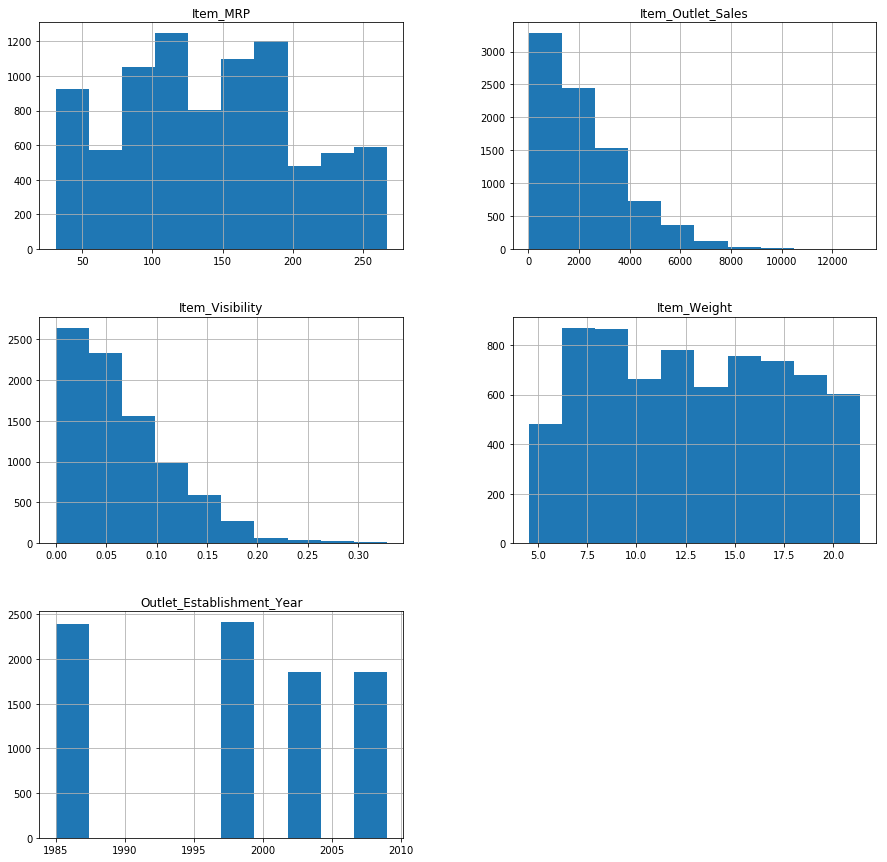

In [17]:
big_train.hist(figsize=(15,15))

In [18]:
big_train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [19]:
big_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

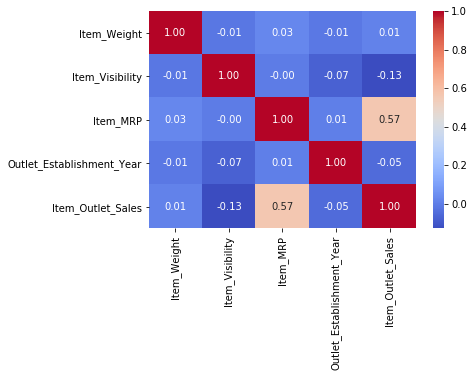

In [20]:
# checking for correlation among variables
sns.heatmap(big_train.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

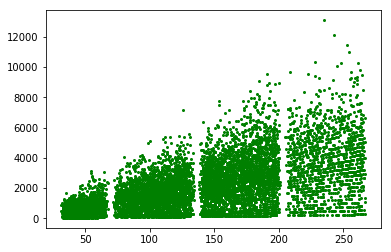

In [21]:
plt.scatter('Item_MRP','Item_Outlet_Sales',c='green',s=4,data=big_train)

In [22]:
pd.crosstab(big_data['Outlet_Type'],big_data['Outlet_Size'],margins=True)

Outlet_Size,High,Medium,Small,All
Outlet_Type,,,,
Grocery Store,0,0,880,880
Supermarket Type1,1553,1550,3100,6203
Supermarket Type2,0,1546,0,1546
Supermarket Type3,0,1559,0,1559
All,1553,4655,3980,10188


In [23]:
big_train.pivot_table(index='Outlet_Type',columns='Outlet_Size',values='Item_Outlet_Sales')

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,NaN,NaN,340.329723
Supermarket Type1,2298.995256,2348.354635,2358.343066
Supermarket Type2,NaN,1995.498739,NaN
Supermarket Type3,NaN,3694.038558,NaN


In [24]:
Out_s=big_train.pivot_table(index='Outlet_Type',columns='Outlet_Size',values='Item_Outlet_Sales')

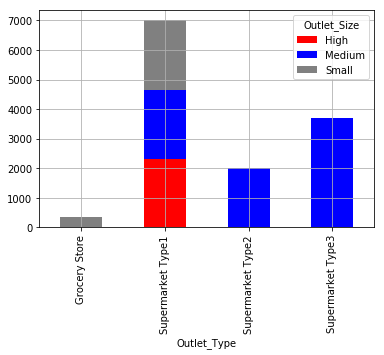

In [25]:
plt.figure(figsize=(10,10))
Out_s.plot(kind='bar',stacked=True,color=['red','blue','grey','yellow'],grid=True)

<Container object of 8523 artists>

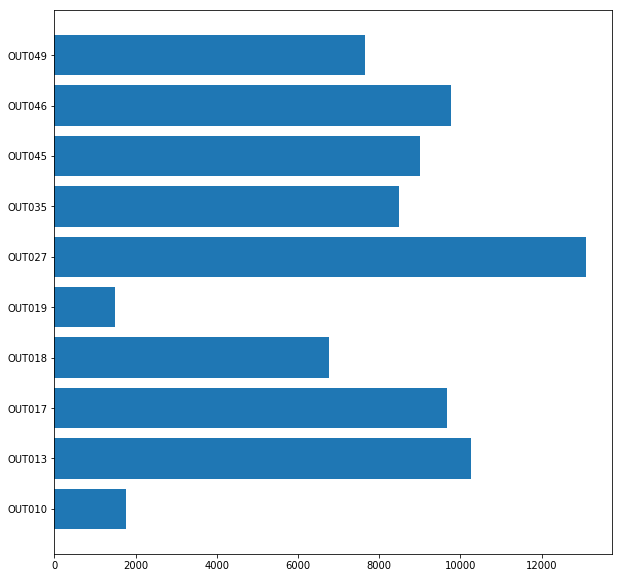

In [26]:
plt.figure(figsize=(10,10))
plt.barh(big_train.Outlet_Identifier,big_train.Item_Outlet_Sales)

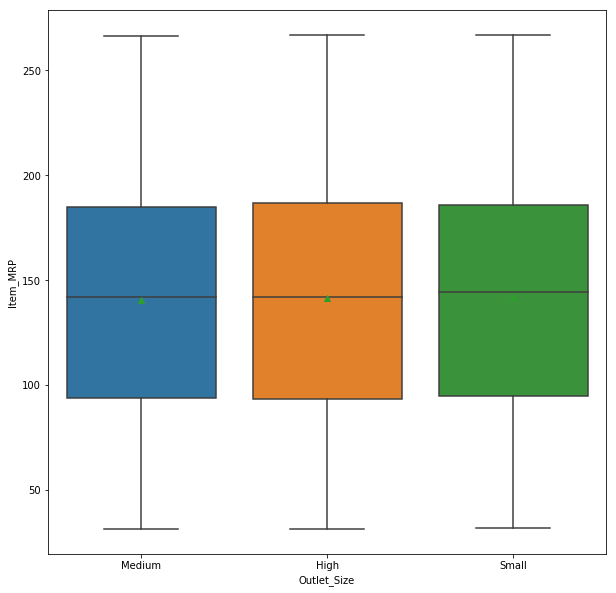

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(x=big_train['Outlet_Size'],y=big_train['Item_MRP'],showmeans=True)
plt.show()

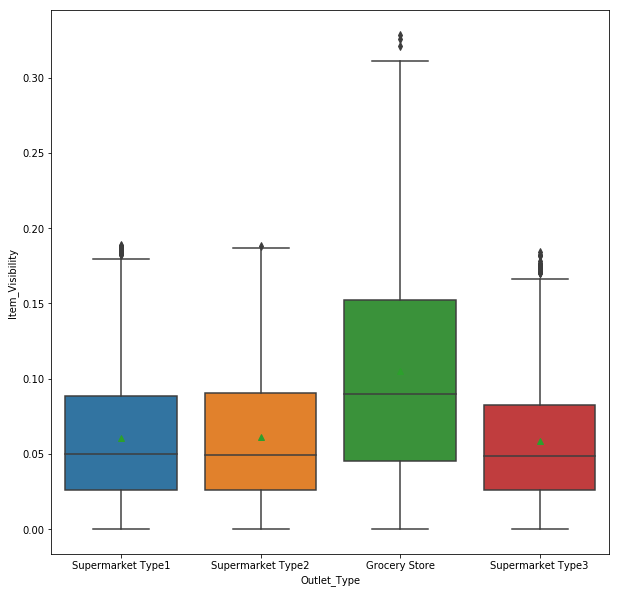

In [28]:
plt.figure(figsize=(10,10))
sns.boxplot(x=big_train['Outlet_Type'],y=big_train['Item_Visibility'],showmeans=True)
plt.show()

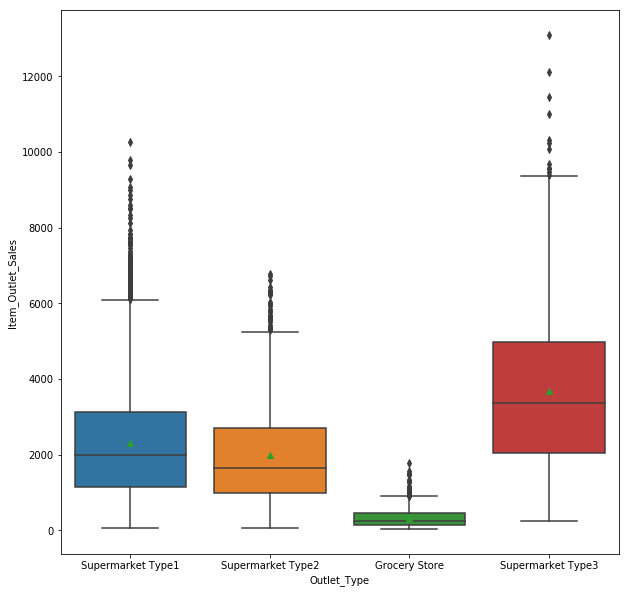

In [29]:
plt.figure(figsize=(10,10))
sns.boxplot(x=big_train['Outlet_Type'],y=big_train['Item_Outlet_Sales'],showmeans=True)
plt.show()

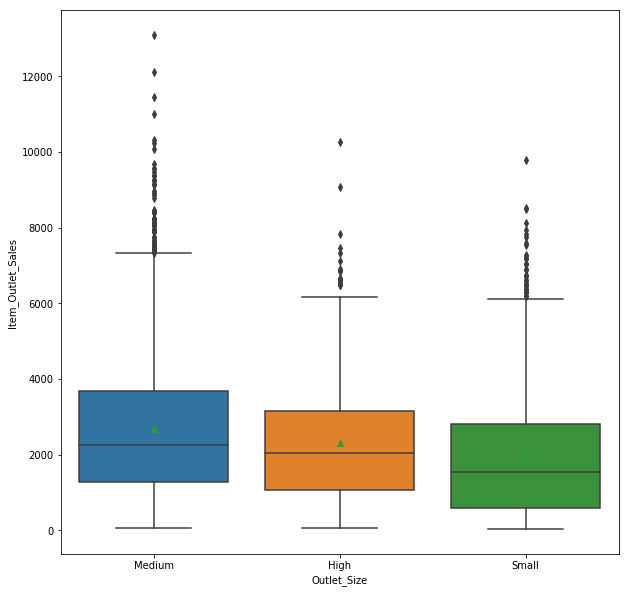

In [30]:
plt.figure(figsize=(10,10))
sns.boxplot(x=big_train['Outlet_Size'],y=big_train['Item_Outlet_Sales'],showmeans=True)
plt.show()

In [31]:
#item_avg_weight = big_data.pivot_table(values='Item_Weight', columns='Item_Identifier')
item_avg_weight = big_data.groupby("Item_Identifier").Item_Weight.mean()

In [32]:
item_avg_weight 

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
DRB24     8.785
DRB25    12.300
DRB48    16.750
DRC01     5.920
DRC12    17.850
DRC13     8.260
DRC24    17.850
DRC25     5.730
DRC27    13.800
DRC36    13.000
DRC49     8.670
DRD01    12.100
DRD12     6.960
DRD13    15.000
DRD15    10.600
DRD24    13.850
DRD25     6.135
DRD27    18.750
DRD37     9.800
DRD49     9.895
DRD60    15.700
DRE01    10.100
DRE03    19.600
DRE12     4.590
DRE13     6.280
          ...  
NCX05    15.200
NCX06    17.600
NCX17    21.250
NCX18    14.150
NCX29    10.000
NCX30    16.700
NCX41    19.000
NCX42     6.360
NCX53    20.100
NCX54     9.195
NCY05    13.500
NCY06    15.250
NCY17    18.200
NCY18     7.285
NCY29    13.650
NCY30    20.250
NCY41    16.750
NCY42     6.380
NCY53    20.000
NCY54     8.430
NCZ05     8.485
NCZ06    19.600
NCZ17    12.150
NCZ18     7.825
NCZ29    15.000
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: It

In [33]:
#Get a boolean variable specifying missing Item_Weight values
miss_bool = big_data['Item_Weight'].isnull() 
miss_bool

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7         True
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18        True
19       False
20       False
21        True
22       False
23        True
24       False
25       False
26       False
27       False
28       False
29        True
         ...  
14174    False
14175    False
14176    False
14177    False
14178     True
14179     True
14180    False
14181    False
14182    False
14183    False
14184     True
14185    False
14186    False
14187    False
14188     True
14189    False
14190    False
14191    False
14192     True
14193    False
14194    False
14195    False
14196    False
14197    False
14198    False
14199    False
14200    False
14201    False
14202    False
14203    False
Name: Item_Weight, Length: 14204, dtype: bool

In [34]:
#Impute big_data and check #missing values before and after imputation to confirm
print ('Orignal #missing: %d'% sum(miss_bool))
big_data.loc[miss_bool,'Item_Weight'] = big_data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight[x])

Orignal #missing: 2439


In [35]:
print ('Final #missing: %d'% sum(big_data['Item_Weight'].isnull()))

Final #missing: 0


In [36]:
from scipy.stats import mode

In [37]:
outlet_size_mode = big_data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]) )
print ('Mode for each Outlet_Type:')
print (outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
miss_bool = big_data['Outlet_Size'].isnull() 
#Impute big_data and check #missing values before and after imputation to confirm
print ('\nOrignal #missing: %d'% sum(miss_bool))
big_data.loc[miss_bool,'Outlet_Size'] = big_data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print (sum(big_data['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 4016
0


In [38]:
big_data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

In [39]:
big_data.groupby('Outlet_Type').Item_Outlet_Sales.mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [42]:
v=big_data.groupby(['Item_Identifier','Outlet_Type']).Item_Visibility.mean()

Item_Identifier  Outlet_Type      
DRA12            Grocery Store        0.068535
                 Supermarket Type1    0.027341
                 Supermarket Type2    0.041113
                 Supermarket Type3    0.040748
DRA24            Grocery Store        0.068370
                 Supermarket Type1    0.039983
                 Supermarket Type2    0.040091
                 Supermarket Type3    0.039735
DRA59            Grocery Store        0.219055
                 Supermarket Type1    0.106661
                 Supermarket Type2    0.128449
                 Supermarket Type3    0.127308
DRB01            Grocery Store        0.143991
                 Supermarket Type1    0.065896
                 Supermarket Type2    0.082574
                 Supermarket Type3    0.081841
DRB13            Grocery Store        0.011791
                 Supermarket Type1    0.007054
                 Supermarket Type2    0.007073
                 Supermarket Type3    0.000000
DRB24            Supermar

In [43]:
visibility_avg=big_data.groupby('Item_Identifier').Item_Visibility.mean()

In [48]:
miss_bool = (big_data['Item_Visibility'] == 0)
print ('Number of 0 values initially: %d'%sum(miss_bool))
big_data.loc[miss_bool,'Item_Visibility'] = big_data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg[x])
print ('Number of 0 values after modification: %d'%sum(big_data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [49]:
big_data['Item_Visibility_MeanRatio'] = big_data.apply(lambda x: x['Item_Visibility']/visibility_avg[x['Item_Identifier']], axis=1)
print (big_data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [51]:
big_data['Item_Type_Combined'] = big_data['Item_Identifier'].apply(lambda x: x[0:2])

In [52]:
#Rename them to more intuitive categories:
big_data['Item_Type_Combined'] = big_data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
big_data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [53]:
big_data['Outlet_Years'] = 2013 - big_data['Outlet_Establishment_Year']
big_data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [54]:
big_data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [55]:
big_data['Item_Fat_Content'] = big_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [56]:
big_data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [57]:
big_data.loc[big_data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
big_data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [58]:
big_data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.931078,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,0.933420,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.960069,Food,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,1.000000,Food,15
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,1.000000,Non-Consumable,26


In [59]:
big_data = pd.get_dummies(big_data,drop_first=True ,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet_Identifier'])

In [60]:
big_data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [61]:
train = big_data.loc[big_data['source']=="train"]
test = big_data.loc[big_data['source']=="test"]

In [62]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\dushy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dushy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
test.dtypes

Item_Identifier                       object
Item_MRP                             float64
Item_Visibility                      float64
Item_Weight                          float64
Item_Visibility_MeanRatio            float64
Outlet_Years                           int64
Item_Fat_Content_Non-Edible            uint8
Item_Fat_Content_Regular               uint8
Outlet_Location_Type_Tier 2            uint8
Outlet_Location_Type_Tier 3            uint8
Outlet_Size_Medium                     uint8
Outlet_Size_Small                      uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Type_Supermarket Type3          uint8
Item_Type_Combined_Food                uint8
Item_Type_Combined_Non-Consumable      uint8
Outlet_Identifier_OUT013               uint8
Outlet_Identifier_OUT017               uint8
Outlet_Identifier_OUT018               uint8
Outlet_Identifier_OUT019               uint8
Outlet_Identifier_OUT027               uint8
Outlet_Ide

In [64]:
train.drop('Item_Identifier',axis=1,inplace=True)

C:\Users\dushy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score,accuracy_score,confusion_matrix

In [67]:
train_dep=train['Item_Outlet_Sales']
train_ind=train.drop(['Item_Outlet_Sales'],axis=1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
train_ind, train_dep, test_size=0.3, random_state=0)

In [69]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso,LassoLarsCV

In [70]:
Reg=LinearRegression(normalize=True)

In [71]:
model=Reg.fit(X_train,y_train)

In [72]:
print('Coefficients: \n', Reg.coef_)

Coefficients: 
 [ 1.53477280e+01 -1.57038219e+02 -1.07957196e+00  1.18781871e+02
 -9.22196247e+13  1.64469056e+14  2.32258619e+01  6.01410856e+15
  3.04834917e+15 -2.04240159e+15 -6.78127237e+15 -6.48390664e+15
 -1.23188333e+16 -7.55679468e+15  4.41300822e+01 -1.64469056e+14
  7.17050138e+14  2.68817063e+15  6.56554662e+15  4.24720429e+15
  4.01677902e+15  2.96482950e+15  3.14926875e+15  9.62447543e+15
  4.70116540e+15]


In [73]:
cv_scores=cross_val_score(Reg,X_train,y_train,cv=20,scoring='neg_mean_squared_error')

In [74]:
rmse_scores = np.sqrt(-cv_scores)

In [75]:
rmse_scores.mean()

1118.4932888899243

In [76]:
predictions=Reg.predict(X_test)

In [77]:
prediction_test=Reg.predict(test.drop(['Item_Identifier'],axis=1))

In [78]:
model.score(X_test, y_test)

0.56375928080261

In [79]:
pd.DataFrame({'Item_Identifier':big_test.Item_Identifier,'Outlet_Identifier':big_test.Outlet_Identifier,'Item_Outlet_Sales':prediction_test}).to_csv('big_submiss2.csv',index=False)

In [80]:
import statsmodels.api as sm

In [81]:
model = sm.OLS(y_train,X_train).fit()
#predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     478.8
Date:                Tue, 28 Aug 2018   Prob (F-statistic):               0.00
Time:                        12:27:56   Log-Likelihood:                -50337.
No. Observations:                5966   AIC:                         1.007e+05
Df Residuals:                    5949   BIC:                         1.008e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Item_MRP                             15.3493      0.232     66.030      0.000      14.894      15.805
Item_Visibility                    -186.1774    304.052     -0.612      0.540    -782.230     409.875
Item_Weight                          -1.2618      3.116     -0.405      0.686      -7.370       4.846
Item_Visibility_MeanRatio            99.3906    116.887      0.850      0.395    -129.750     328.531
Outlet_Years                        -14.2855      4.680     -3.052      0.002     -23.460      -5.111
Item_Fat_Content_Non-Edible           3.5092     29.463      0.119      0.905     -54.249      61.267
Item_Fat_Content_Regular             27.8035     33.504      0.830      0.407     -37.877      93.484
Outlet_Location_Type_Tier 2         478.1212     24.514     19.504      0.000     430.065     526.177
Outlet_Location_Type_Tier 3        -569.6253     63.162     -9.018      0.000    -693.446    -445.804
Outlet_Size_Medium                  317.1958     34.789      9.118      0.000     248.997     385.395
Outlet_Size_Small                 -1146.6147     89.228    -12.850      0.000   -1321.534    -971.696
Outlet_Type_Supermarket Type1       684.5879     26.482     25.851      0.000     632.673     736.503
Outlet_Type_Supermarket Type2        10.1849     32.059      0.318      0.751     -52.663      73.033
Outlet_Type_Supermarket Type3      1023.9409     40.088     25.543      0.000     945.355    1102.527
Item_Type_Combined_Food              43.0316     52.909      0.813      0.416     -60.689     146.752
Item_Type_Combined_Non-Consumable     3.5092     29.463      0.119      0.905     -54.249      61.267
Outlet_Identifier_OUT013            255.8734     38.190      6.700      0.000     181.008     330.739
Outlet_Identifier_OUT017            161.9701     39.388      4.112      0.000      84.756     239.184
Outlet_Identifier_OUT018             10.1849     32.059      0.318      0.751     -52.663      73.033
Outlet_Identifier_OUT019           -432.6345     31.140    -13.893      0.000    -493.680    -371.589
Outlet_Identifier_OUT027           1023.9409     40.088     25.543      0.000     945.355    1102.527
Outlet_Identifier_OUT035            231.3895     37.143      6.230      0.000     158.575     304.204
Outlet_Identifier_OUT045             84.7616     37.594      2.255      0.024      11.063     158.460
Outlet_Identifier_OUT046            667.5232     40.467     16.495      0.000     588.192     746.854
Outlet_Identifier_OUT049           -716.9300     55.159    -12.998      0.000    -825.062    -608.799
==============================================================================
Omnibus:                      794.789   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            

In [82]:
alg2 = Ridge(alpha=0.05,normalize=True)

In [83]:
model1=alg2.fit(X_train,y_train)

In [84]:
predictions_Ridge=alg2.predict(X_test)

In [85]:
cv_scores=cross_val_score(alg2,X_train,y_train,cv=20,scoring='neg_mean_squared_error')

In [86]:
rmse_scores = np.sqrt(-cv_scores)

In [87]:
rmse_scores.mean()

1121.0841971332225

In [88]:
model1.score(X_test, y_test)

0.5589448937874218

In [89]:
prediction_test=alg2.predict(test.drop(['Item_Identifier'],axis=1))

In [90]:
pd.DataFrame({'Item_Identifier':big_test.Item_Identifier,'Outlet_Identifier':big_test.Outlet_Identifier,'Item_Outlet_Sales':prediction_test}).to_csv('big_submiss2.csv',index=False)

In [91]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [92]:
model_tree = DecisionTreeRegressor(max_depth=5,random_state=0,min_samples_leaf=100)

In [93]:
model_tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [95]:
dot_data = StringIO()

export_graphviz(model_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
#dot_data.close()

InvocationException: GraphViz's executables not found

In [96]:
cv_scores=cross_val_score(model_tree,X_train,y_train,cv=20,scoring='neg_mean_squared_error')

In [97]:
rmse_scores = np.sqrt(-cv_scores)

In [98]:
 rmse_scores.mean()

1094.50441994202

In [99]:
model_tree.score(X_test, y_test)

0.5749001671545204

In [100]:
X_train.head()

,Item_MRP,Item_Visibility,Item_Weight,Item_Visibility_MeanRatio,Outlet_Years,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,...,Item_Type_Combined_Non-Consumable,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
88,95.6436,0.123116,6.305,0.999070,16,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6813,146.8418,0.043809,5.980,0.879677,6,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4046,160.7920,0.072317,13.500,0.858474,28,1,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
8194,157.8630,0.299098,18.250,1.614811,28,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8293,47.2718,0.080278,9.100,0.874563,9,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [101]:
model_tree.feature_importances_

array([0.56671505, 0.        , 0.        , 0.30495899, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00543339, 0.        , 0.11988802, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00300454, 0.        , 0.        , 0.        , 0.        ])

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)

In [104]:
alg5.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=100, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [106]:
cv_scores=cross_val_score(alg5,X_train,y_train,cv=20,scoring='neg_mean_squared_error')

In [107]:
rmse_scores = np.sqrt(-cv_scores)

In [108]:
rmse_scores.mean()

1096.9735639484309

In [109]:
alg5.score(X_test, y_test)

0.5693443608473372

In [110]:
prediction_rft=alg5.predict(test.drop(['Item_Identifier'],axis=1))

In [112]:
lasso = Lasso(alpha=0.5,max_iter = 10000, normalize = True)

lasso.fit(X_train,y_train)

cv_scores=cross_val_score(lasso,X_train,y_train,cv=20,scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-cv_scores)

print(rmse_scores.mean())

lasso.score(X_test, y_test)

1135.5836466580495


0.5439257139623748